# Regressão Logistica
Avaliando a relação entre diabetes e IMC com regressão logística

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

## Baixando dataset

Descomente este código caso estejas no google colab

In [ ]:
# !pip install wget
# !wget https://raw.githubusercontent.com/plorazxi/Inteligencia-computacional/refs/heads/main/Logistic-Regression/diabetes.csv

## Importando dataset

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preparando dataset

In [17]:
x = df["BMI"]
y = df["Outcome"]
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

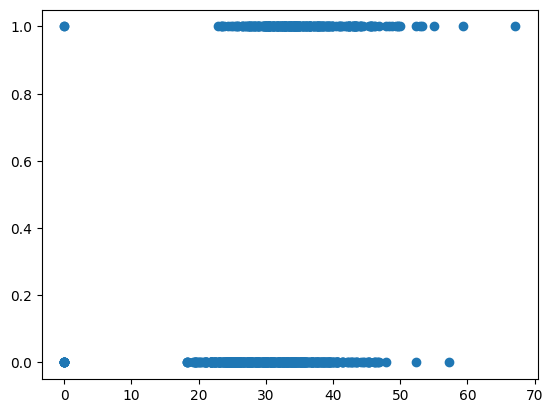

In [18]:
plt.scatter(x, y)
plt.show()

## Criando classe da algoritmo de regressão logística

In [ ]:
class LogisticRegression():
    def __init__(self, x, y, epochs, learnRate):
        # Começando de forma não aleatoria, mas através de uma regressão linear
        ModeloLinear = linear_model.LinearRegression().fit(x, y)
        self.a = ModeloLinear.coef_[0][0] # Peso do unico input
        self.b = ModeloLinear.intercept_[0] # BIAS
        self.epochs = epochs
        self.learningRate = learnRate

    def prediction(self, x):
        return 1 / (1 + np.exp(-(self.a*x + self.b)))

    def fit(self, x, y):
        for _ in range(self.epochs):
            y_hat = self.prediction(x)
            err = log_loss(y, y_hat)
            # self.a -= self.learningRate * gradiente

